In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO
import scipy
sns.set_context("talk")
sns.set_theme(style="white")

# Load Homfam 
# Load Benchfam 

benchfam_file = os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/refs/", "02_summary_benchfam_refs.csv")
homfam_file = os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/refs/", "02_summary_homfam_refs.csv")

In [9]:
# Load and prep
homfam = pd.read_csv(homfam_file)
benchfam = pd.read_csv(benchfam_file)
homfam["mean_length"] = homfam["mean"]
homfam = homfam[["family", "n_sequences", "mean_length", "sim"]]
homfam["benchmarking_dataset"]  = "homfam"
benchfam["mean_length"] = benchfam["mean"]
benchfam = benchfam[["family", "n_sequences", "mean_length", "sim", "benchmarking_dataset"]]

In [10]:
families = pd.concat([homfam,benchfam])
families["n_sequences"] = families["n_sequences"].astype(int)
families = families.reset_index().drop("index", axis = 1)

In [11]:
families.head(2)

,family,n_sequences,mean_length,sim,benchmarking_dataset
0,blm-ref,8,261.375,39.61,homfam
1,ghf11-ref,5,185.400,51.00,homfam


In [12]:
families.groupby("benchmarking_dataset").count()

,family,n_sequences,mean_length,sim
benchmarking_dataset,,,,
benchfam,666,666,666,666
homfam,94,94,94,94


Two-sided: MannwhitneyuResult(statistic=5724.0, pvalue=7.742814297903123e-38)
Homfam less than benchfam: MannwhitneyuResult(statistic=5724.0, pvalue=3.8714071489515615e-38)


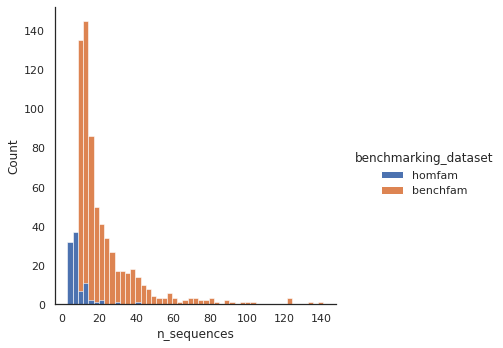

In [17]:
sns.displot(data=families, x="n_sequences", hue = "benchmarking_dataset", alpha = 1)
print("Two-sided: "+ str(scipy.stats.mannwhitneyu(homfam.n_sequences, benchfam.n_sequences)))
print("Homfam less than benchfam: "+ str(scipy.stats.mannwhitneyu(homfam.n_sequences, benchfam.n_sequences, alternative = "less")))

MannwhitneyuResult(statistic=36670.5, pvalue=0.007058412987226339)

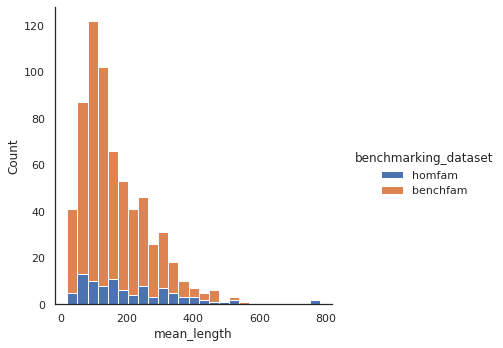

In [18]:
sns.displot(data=families, x="mean_length", hue = "benchmarking_dataset", alpha = 1)
scipy.stats.mannwhitneyu(homfam.mean_length, benchfam.mean_length)

Two-sided: MannwhitneyuResult(statistic=45636.0, pvalue=6.307567808240093e-13)
Homfam greater than benchfam: MannwhitneyuResult(statistic=45636.0, pvalue=3.1537839041200467e-13)


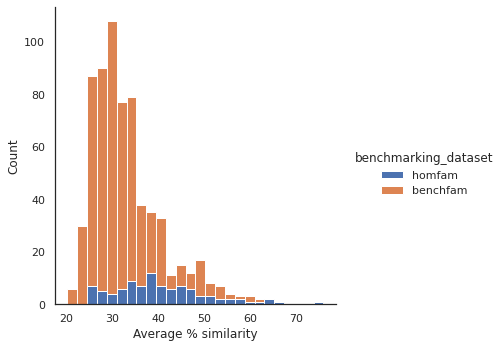

In [19]:
ax = sns.displot(data=families, x="sim", hue = "benchmarking_dataset", alpha = 1)
ax.set(xlabel="Average % similarity")
print("Two-sided: "+ str(scipy.stats.mannwhitneyu(homfam.sim, benchfam.sim)))
print("Homfam greater than benchfam: "+ str(scipy.stats.mannwhitneyu(homfam.sim, benchfam.sim, alternative = "greater")))

MannwhitneyuResult(statistic=5724.0, pvalue=7.742814297903123e-38)

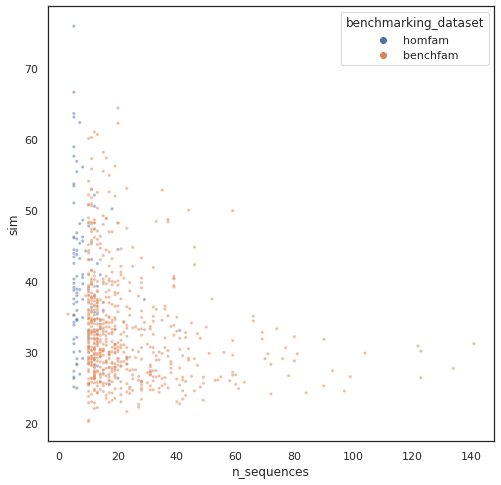

In [16]:
size_fig = 1
f, ax = plt.subplots(figsize=(8*size_fig,8*size_fig ))
sns.scatterplot(data=families, x="n_sequences",y="sim", s = 10, hue = "benchmarking_dataset", alpha = 0.5)
scipy.stats.mannwhitneyu(homfam.n_sequences, benchfam.n_sequences)